In [1]:
import numpy as np
from myPackages import EX as ex
import matplotlib.pyplot as plt
from scipy.optimize import minimize

ExTRA correctly imported


In [2]:
with open("ExTRA/data/astrometry/HIP/Main_Cat.d") as f:
    HIP_solutions=[]
    for line in f:
        line=line.strip()
        line=line.split()
        
        stand=line[4:9]
        stand.insert(0,line[0])

        stand[1]=np.degrees(float(stand[1]))
        stand[2]=np.degrees(float(stand[2]))
        for i in range(1,len(stand)):
            stand[i]=float(stand[i])
        HIP_solutions.append(stand) #HIP_ident,Asc,dec,parallax,muasc,mudec

HIP_identifier=[list(i) for i in zip(*HIP_solutions)][0]
HIP16537_sol=HIP_solutions[HIP_identifier.index("16537")][1:]

In [3]:
HIP,t_hip=ex.read_hip("ExTRA/data/astrometry/HIP/HIP016537.d")
A3,A4,A5,A6,A7,A8,A9=HIP



In [4]:
def hip_fit(x,HIP,HIP_stand):

    #asc,dec,parallax,mu_asc,mu_dec,P,e,om,i,Om,T0,a=x

    correction=x[:5]
    orbit=x[5:]
    

    L=ex.L_hip(HIP,HIP_stand,HIP_stand,correction,*orbit)

    return L



In [27]:
P,e,om,i,Om,T0,a=2502.1,0.608,np.radians(48.9),np.radians(23),np.radians(280),2449194.8,2.761

initital=[0,0,0,0,0,P,e,om,i,Om,T0,a]
bnds=[(-10,10),(-10,10),(-10,10),(-10,10),(-10,10),(2450,2550),(0.6,0.61),(-2*np.pi,+2*np.pi),(0,np.pi),(-2*np.pi,+2*np.pi),(0,20000),(1,10)]
popt=minimize(hip_fit,initital,args=(HIP,HIP16537_sol),bounds=bnds,method="L-BFGS-B",tol=1e-10,options={"maxiter":1000000})
popt

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 84.0878722571421
        x: [ 0.000e+00  9.539e-06 -7.870e-02  7.463e-01 -2.493e-02
             2.498e+03  6.100e-01 -1.384e+00  1.178e+00  4.498e+00
             2.000e+04  1.093e+00]
      nit: 41
      jac: [ 0.000e+00  0.000e+00 -6.253e-05 -5.400e-05 -2.842e-06
             6.679e-05 -2.635e+00 -2.700e-05 -1.421e-06 -9.948e-06
             0.000e+00  4.690e-05]
     nfev: 611
     njev: 47
 hess_inv: <12x12 LbfgsInvHessProduct with dtype=float64>

In [28]:
popt.x[5:]

array([ 2.49830647e+03,  6.10000000e-01, -1.38398105e+00,  1.17785036e+00,
        4.49842690e+00,  1.99999962e+04,  1.09292662e+00])

In [29]:
t_test=np.linspace(T0-1500,T0+1500,100)

In [30]:
eri=P,e,om,i,Om,T0,a
orbit=ex.orbit(P,e,om,i,Om,T0,a,t_test)

In [31]:
a

2.761

In [32]:
def hip_corrected(stand_fit,orbit_par,hip_stand,hip_deriv):
    A3,A4,A5,A6,A7,A8,A9=hip_deriv
    abs=A8

    t=ex.JD_hip(A4,A7)

    P,e,om,i,Om,T0,a=orbit_par

    x_O,y_O=ex.orbit(*orbit_par,t)
    newabs=ex.abs_res(abs,stand_fit,hip_stand,hip_deriv)

    res_hip_final=newabs-(A3*x_O+A4*y_O)

    x,x_err,y,y_err=ex.hip_2d(A3,A4,res_hip_final,A9)

    return x,x_err,y,y_err

In [33]:
HIP16537_sol=np.array(HIP16537_sol)
corhip=HIP16537_sol+np.array([1,1,1,-5,1])

In [34]:
k,k1,l,l1=hip_corrected(corhip,eri,HIP16537_sol,HIP)

In [35]:
k+ex.orbit(*eri,ex.JD_hip(A4,A7))[0]

array([-5.84838154, -7.08205324, -6.34661669, -6.23765313, -2.67778346,
       -3.732765  , -3.49052714,  2.24830599,  2.22249143, -4.37976697,
       -6.21001894, -5.07990538, -4.11381423, -1.54206728, -1.73791333,
       -1.01436849, -2.21695854, -3.18287725, -1.53349846, -2.71263535,
        1.8483776 ,  1.84064612,  1.77874825,  1.80398794,  1.38064174,
        1.94326374,  1.23591146,  1.59380226,  1.44575656,  1.73954218,
        1.49441379,  1.75354146,  0.88928775,  0.8255318 ,  0.88675069,
        0.89709741,  0.87401301,  0.87901167,  0.84279203,  0.8865154 ,
        0.10736963,  0.05394797, -0.0509649 ,  0.13917955,  0.31251573,
        0.27531482, -0.81817441, -0.90950986,  0.90350959,  0.85484011,
        1.74212174,  0.80255767, -0.49406601, -0.52734819, -0.11942717,
       -0.56390098, -0.73497279, -0.44112589, -0.84747499, -0.91073326,
       -0.57101156,  3.68226184,  2.20974786,  1.55101994,  3.20808579,
        2.27206485,  1.64003641,  1.35381995,  1.38543723,  1.45

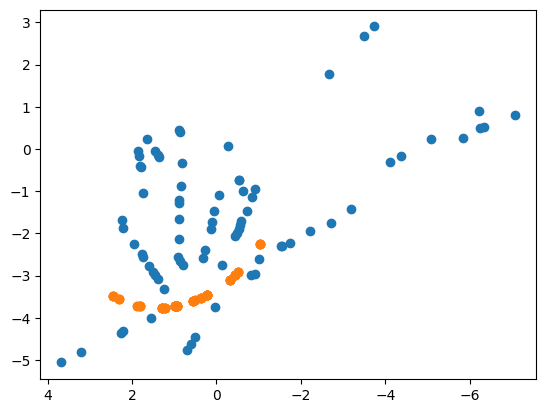

In [36]:
x_O,y_O=ex.orbit(*eri,t_test)


#plt.scatter(x_O,y_O)
plt.scatter(k+ex.orbit(*eri,ex.JD_hip(A4,A7))[0],l+ex.orbit(*eri,ex.JD_hip(A4,A7))[1])
plt.scatter(*ex.orbit(*eri,ex.JD_hip(A4,A7)))
#ex.plot_real(*ex.hip_2d(A3,A4,A8,A9),s=50)
plt.axis("equal")
plt.gca().invert_xaxis()

In [37]:
HIP16537_sol=np.array(HIP16537_sol)

In [38]:
corrected=ex.hip_2d(*hip_corrected(HIP16537_sol,eri,HIP16537_sol,HIP))

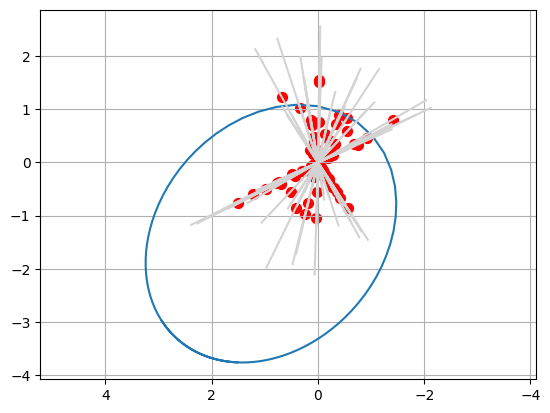

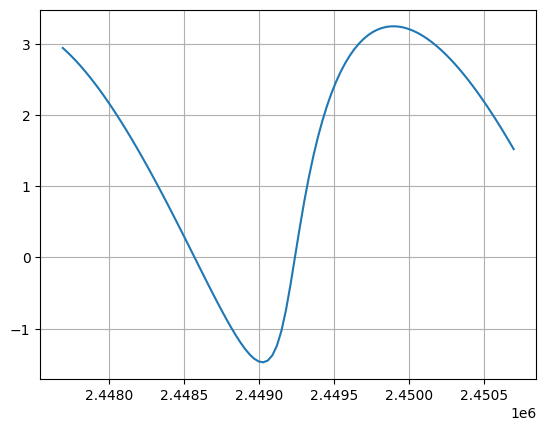

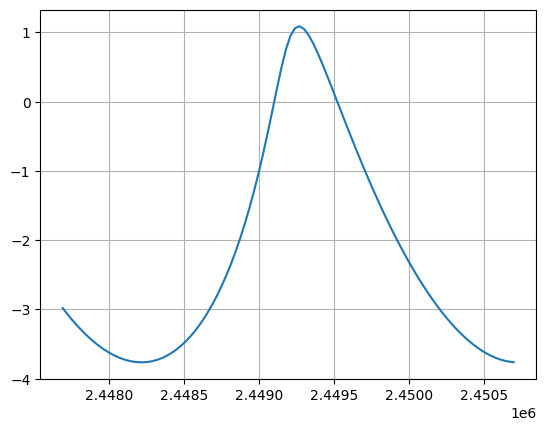

In [39]:

plt.plot(*ex.orbit(P,e,om,i,Om,T0,a,t_test))
ex.plot_real(*ex.hip_2d(A3,A4,A8,A9),s=50)
#ex.plot_not(*corrected,s=50)
plt.gca().invert_xaxis()
plt.axis("equal")
plt.grid()
plt.show()

plt.plot(t_test,ex.orbit(P,e,om,i,Om,T0,a,t_test)[0])
plt.grid()
plt.show()

plt.grid()
plt.plot(t_test,ex.orbit(P,e,om,i,Om,T0,a,t_test)[1])
plt.show()


In [18]:
K1=19

In [23]:
K=19

In [24]:
K1*P*(1-e**2)**0.5 *HIP16537_sol[2]/(2*np.pi*np.sin(i)*1.5*10**11)*206265

6.573721224550679

In [25]:
a=(P*86400*(1-e**2)**0.5)*HIP16537_sol[2]*K /(2*np.pi*np.sin(i)*1.495978707e11)

In [26]:
a

2.760993162531037

NameError: name 'parallax' is not defined

In [20]:
HIP16537_sol

array([  53.23509022,   -9.45830604,  310.95      , -975.17      ,
         19.48      ])

In [ ]:
    K1=2*np.pi*a*np.sin(i)*1.495978707e11/(parallax)
    K2=(P*86400*(1-e**2)**0.5)
    K=K1/K2